In [14]:
# https://docs.rocketpy.org/en/latest/index.html

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%pip install rocketpy

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached charset_normalizer-3.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 34.0 MB/s eta 0:00:0000:0100:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 44.5 MB/s eta 0:00:00
Using cached charset_normalizer-3.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (141 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached urllib3-2.2

In [4]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [5]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

/home/unknown/Clubs/Launch/Misc/DeploymentMod/.direnv/python-3.12/lib/python3.12/site-packages/rocketpy/mathutils/function.py:3125: UserWarning: Extrapolation method set to 'constant' because the linear method is not supported.
  warnings.warn(


In [6]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time


In [7]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.7802 m/s²


Launch Site Details

Launch Date: 2024-08-02 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 5.000 km
Forecast Time Period: from 2024-08-01 18:00:00 to 2024-08-17 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 64.47 m/s
Surface Wind Direction: 179.69°
Surface Wind Heading: 3.73°
Surface Pressure: 859.00 hPa
Surface Temperature: 298.05 K
Surface Air Density: 1.004 kg/m³
Surface Speed of Sound: 346.09 m/s


Earth Model Details

Earth Radius at Launch s

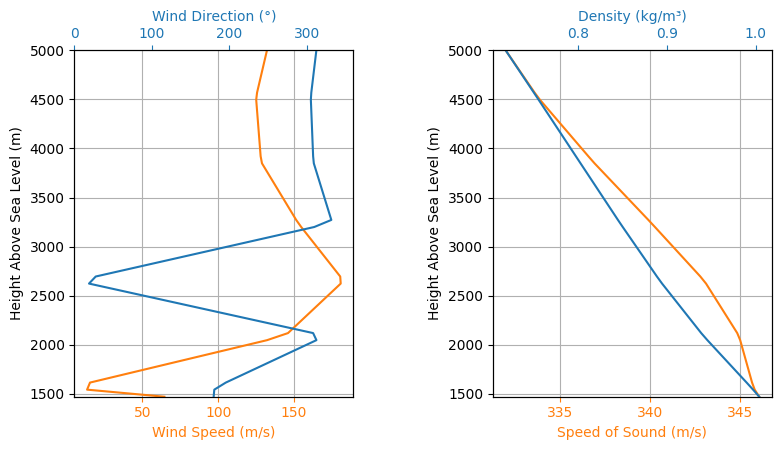

In [8]:
env.max_expected_height = 5000  # adjust the plots to this height
env.info()


In [11]:
Pro75M1670 = SolidMotor(
    thrust_source="Data/Rocketpy/Motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



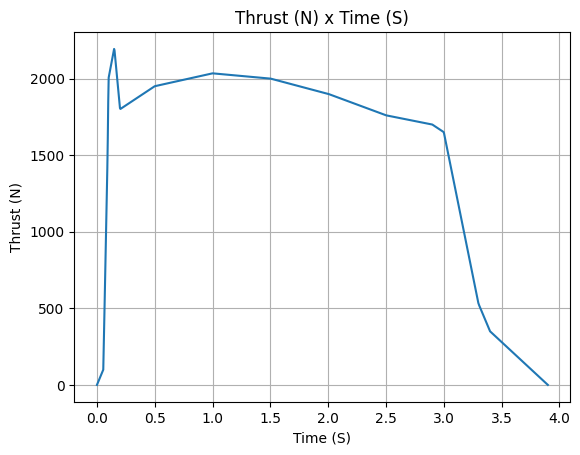

In [12]:
Pro75M1670.info()

In [13]:
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)


ValueError: Could not read the csv or txt file to create Function source.